## 1.Environment Setup

In [1]:
# Import thư viện cần thiết
import os
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

warnings.filterwarnings('ignore')

# Đặt seed để đảm bảo kết quả nhất quán giữa các lần chạy
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)
random.seed(SEED)
print(f"Seed: {SEED}")

Seed: 42


## 2.Data Processing

In [2]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    display(df.head())

    X = df.drop('target', axis=1)
    y = df['target']
    display(y.value_counts())

    print("Shape df: ", df.shape)
    print("Shape X: ", X.shape)
    print("Shape y: ", y.shape)

    return X, y

### 2.1 Original Dataset

In [3]:
X_train, y_train = read_csv('splits/raw_train.csv')
X_val, y_val = read_csv('splits/raw_val.csv')
X_test, y_test = read_csv('splits/raw_test.csv')

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0,1
1,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0,0
3,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,0
4,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-1.063621,0.400391,-0.262410,0.089984,-0.713154,0.0,1.000000,0.0,1.0,1.0,0.5,0.0,0.0,0
1,1.720848,-0.054513,1.368307,-1.809349,1.250048,1.0,1.000000,0.0,1.0,0.0,0.5,1.0,0.0,1
2,-0.061212,1.082748,-0.338257,0.664201,0.536156,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.941197,0.229802,0.040979,0.973394,-0.891627,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.495681,0.229802,-0.300333,0.487519,-0.445445,1.0,1.000000,0.0,0.0,0.0,0.5,0.0,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.384303,-0.168240,-0.641646,-0.837597,1.071575,1.0,1.000000,0.0,1.0,1.0,0.5,1.0,1.0,1
1,-2.288787,-0.736870,-1.286348,1.061736,-0.891627,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.829818,-0.054513,-0.357219,-0.175039,0.714629,1.0,0.666667,0.0,0.0,0.0,0.5,1.0,1.0,0
3,-0.395349,-0.054513,0.116827,-0.042528,-0.445445,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-1.397757,-0.623144,-0.186562,1.945146,-0.177735,1.0,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.2 FE Dataset

In [4]:
X_fe_train, y_fe_train = read_csv('splits/fe_train.csv')
X_fe_val, y_fe_val = read_csv('splits/fe_val.csv')
X_fe_test, y_fe_test = read_csv('splits/fe_test.csv')

,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,0.0,0
3,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,1.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,0.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.262410,1.0,0.089984,0.628019,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.250048,0.0,1.368307,1.0,-1.809349,-1.592443,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.536156,1.0,-0.338257,0.0,0.664201,0.235034,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.040979,0.0,0.973394,-0.161823,0.0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,-0.300333,1.0,0.487519,-0.163464,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,0.0,1.0,0.0,1.071575,0.0,-0.641646,1.0,-0.837597,-0.736915,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,-1.286348,0.0,1.061736,2.749978,1.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.714629,0.0,-0.357219,1.0,-0.175039,-0.619566,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.445445,1.0,0.116827,0.0,-0.042528,0.071622,0.0,0
4,0.0,1.0,0.0,1.0,0.0,1.0,-0.177735,0.0,-0.186562,0.0,1.945146,2.141882,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.3 Original + DT Dataset

In [5]:
# Original + DT Dataset
X_dt_train, y_dt_train = read_csv('splits/dt_train.csv')
X_dt_val, y_dt_val = read_csv('splits/dt_val.csv')
X_dt_test, y_dt_test = read_csv('splits/dt_test.csv')

,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,0.000000,-0.445445,0.458139,-0.729485,0.708371,1.0,0.5,0.0,1
1,0.0,0.333333,0.000000,-0.891627,0.230598,0.050166,0.222495,1.0,0.0,0.0,0
2,0.0,0.333333,0.333333,-0.891627,0.723605,-0.061212,0.399178,0.0,0.0,1.0,0
3,1.0,0.333333,0.000000,-0.891627,1.121803,-0.061212,0.266666,1.0,0.0,0.0,0
4,1.0,1.000000,0.000000,-0.713154,-0.167601,0.272924,-1.190962,0.0,0.5,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 11)
Shape X:  (242, 10)
Shape y:  (242,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,0.0,1.000000,0.0,-0.713154,-0.262410,-1.063621,0.089984,0.0,0.5,1.0,0
1,0.0,1.000000,1.0,1.250048,1.368307,1.720848,-1.809349,1.0,0.5,0.0,1
2,1.0,0.666667,0.0,0.536156,-0.338257,-0.061212,0.664201,1.0,0.0,0.0,0
3,0.0,0.666667,0.0,-0.891627,0.040979,0.941197,0.973394,0.0,0.0,0.0,0
4,1.0,1.000000,0.0,-0.445445,-0.300333,0.495681,0.487519,1.0,0.5,0.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 11)
Shape X:  (30, 10)
Shape y:  (30,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,1.0,1.071575,-0.641646,0.384303,-0.837597,1.0,0.5,1.0,1
1,0.0,0.000000,0.0,-0.891627,-1.286348,-2.288787,1.061736,1.0,0.0,0.0,0
2,1.0,0.666667,1.0,0.714629,-0.357219,0.829818,-0.175039,1.0,0.5,0.0,0
3,0.0,0.666667,0.0,-0.445445,0.116827,-0.395349,-0.042528,0.0,0.0,0.0,0
4,1.0,0.666667,0.0,-0.177735,-0.186562,-1.397757,1.945146,1.0,1.0,0.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 11)
Shape X:  (31, 10)
Shape y:  (31,)


### 2.4 FE + DT Dataset

In [6]:
# FE + DT Dataset
X_fe_dt_train, y_fe_dt_train = read_csv('splits/fe_dt_train.csv')
X_fe_dt_val, y_fe_dt_val = read_csv('splits/fe_dt_val.csv')
X_fe_dt_test, y_fe_dt_test = read_csv('splits/fe_dt_test.csv')
print("Finish!")

,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,1.0,0.952258,0.726265,-0.445445,0.458139,-0.729485,1.0,0.0,1
1,1.0,0.0,1.0,0.082082,-0.054469,-0.891627,0.230598,0.050166,1.0,0.0,0
2,1.0,0.0,0.0,0.606839,0.099522,-0.891627,0.723605,-0.061212,0.0,0.0,0
3,0.0,0.0,1.0,0.965051,0.031766,-0.891627,1.121803,-0.061212,1.0,0.0,0
4,0.0,1.0,1.0,-0.411237,-0.859761,-0.713154,-0.167601,0.272924,0.0,0.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 11)
Shape X:  (242, 10)
Shape y:  (242,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,1.0,1.0,1.0,0.524962,0.628019,-0.713154,-0.262410,-1.063621,0.0,0.0,0
1,1.0,1.0,0.0,-0.068646,-1.592443,1.250048,1.368307,1.720848,1.0,0.0,1
2,0.0,0.0,1.0,-0.348393,0.235034,0.536156,-0.338257,-0.061212,1.0,1.0,0
3,1.0,0.0,1.0,-0.621316,-0.161823,-0.891627,0.040979,0.941197,1.0,1.0,0
4,0.0,1.0,1.0,-0.652540,-0.163464,-0.445445,-0.300333,0.495681,1.0,0.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 11)
Shape X:  (30, 10)
Shape y:  (30,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,0.0,-0.875417,-0.736915,1.071575,-0.641646,0.384303,0.0,0.0,1
1,1.0,0.0,1.0,0.624900,2.749978,-0.891627,-1.286348,-2.288787,1.0,0.0,0
2,0.0,0.0,0.0,-0.873880,-0.619566,0.714629,-0.357219,0.829818,1.0,1.0,0
3,1.0,0.0,1.0,0.317862,0.071622,-0.445445,0.116827,-0.395349,1.0,1.0,0
4,0.0,0.0,1.0,0.957741,2.141882,-0.177735,-0.186562,-1.397757,1.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 11)
Shape X:  (31, 10)
Shape y:  (31,)
Finish!


## 3.Support Vector Machine (SVM)

In [7]:
def find_optimal_svm(
    X_train, y_train,
    C_range=[0.1, 1, 10, 100],
    kernel_options=['linear', 'rbf', 'poly'],
    cv_splits=3, gamma='scale'
):
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    print(f"Đang kiểm tra các giá trị C: {C_range}")
    print(f"Đang kiểm tra các kernel: {kernel_options}")

    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    best_score = 0
    best_params = {}
    results = []

    for kernel in kernel_options:
        for C in C_range:
            svm = SVC(
                C=C,
                kernel=kernel,
                gamma=gamma,
                random_state=SEED
            )
            cv_score = cross_val_score(
                svm, X_train_scaled, y_train, cv=cv, scoring='accuracy', n_jobs=-1
            )
            mean_score = cv_score.mean()
            results.append({
                'kernel': kernel,
                'C': C,
                'cv_score': mean_score
            })
            
            if mean_score > best_score:
                best_score = mean_score
                best_params = {'kernel': kernel, 'C': C}

    print(f"Tham số tối ưu (CV): {best_params}")
    print(f"Điểm CV tốt nhất: {best_score:.4f}")

    # Vẽ biểu đồ so sánh các tham số
    results_df = pd.DataFrame(results)
    
    fig, axes = plt.subplots(1, len(kernel_options), figsize=(15, 5))
    if len(kernel_options) == 1:
        axes = [axes]
    
    for i, kernel in enumerate(kernel_options):
        kernel_data = results_df[results_df['kernel'] == kernel]
        axes[i].plot(kernel_data['C'], kernel_data['cv_score'], 'bo-')
        axes[i].set_xscale('log')
        axes[i].set_title(f'SVM {kernel} kernel')
        axes[i].set_xlabel('C parameter')
        axes[i].set_ylabel('CV Accuracy')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

    # Train lại với toàn bộ X_train
    best_model = SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        gamma=gamma,
        random_state=SEED
    )
    best_model.fit(X_train_scaled, y_train)
    return best_model, scaler, best_params, best_score

def evaluate_val_svm(X_train, y_train, X_val, y_val,
                     C_range=[0.1, 1, 10, 100],
                     kernel_options=['linear', 'rbf', 'poly'],
                     cv_splits=3, gamma='scale'):
    print("Tìm tham số tối ưu cho SVM...")
    svm_model, scaler, best_params, cv_acc = find_optimal_svm(
        X_train, y_train,
        C_range=C_range,
        kernel_options=kernel_options,
        cv_splits=cv_splits,
        gamma=gamma
    )

    # Chuẩn hóa validation set
    X_val_scaled = scaler.transform(X_val)

    # Dự đoán & báo cáo trên validation
    val_pred = svm_model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, val_pred)

    print(f"\nĐộ chính xác SVM trên tập validation: {val_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, val_pred))
    return svm_model, scaler, val_acc, best_params

def evaluate_test_svm(svm_model, scaler, X_test, y_test):
    X_test_scaled = scaler.transform(X_test)
    test_pred = svm_model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"\nĐộ chính xác SVM trên tập test: {test_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, test_pred))
    return test_acc

### 3.1 SVM on Original Dataset

Tìm tham số tối ưu cho SVM...
Đang kiểm tra các giá trị C: [0.1, 1, 10, 100]
Đang kiểm tra các kernel: ['linear', 'rbf', 'poly']
Tham số tối ưu (CV): {'kernel': 'linear', 'C': 10}
Điểm CV tốt nhất: 0.8264


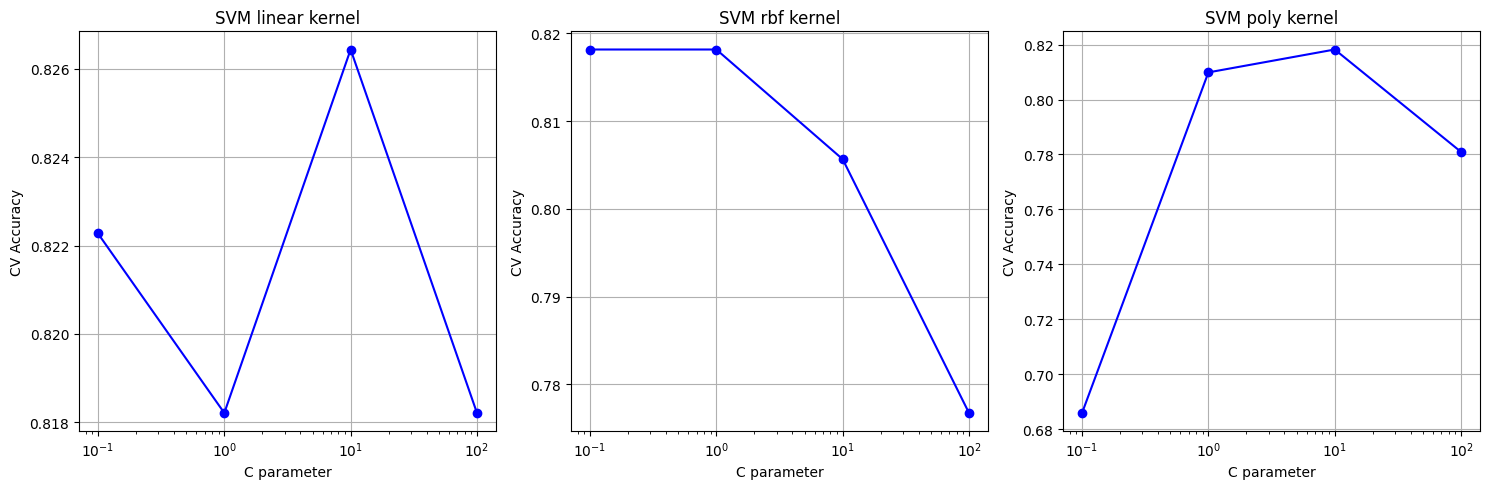


Độ chính xác SVM trên tập validation: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Độ chính xác SVM trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



In [8]:
svm_model, scaler, val_acc, best_params = evaluate_val_svm(
    X_train, y_train, X_val, y_val
)
test_acc = evaluate_test_svm(svm_model, scaler, X_test, y_test)

### 3.2 SVM on FE Dataset

Tìm tham số tối ưu cho SVM...
Đang kiểm tra các giá trị C: [0.1, 1, 10, 100]
Đang kiểm tra các kernel: ['linear', 'rbf', 'poly']
Tham số tối ưu (CV): {'kernel': 'linear', 'C': 1}
Điểm CV tốt nhất: 0.8430


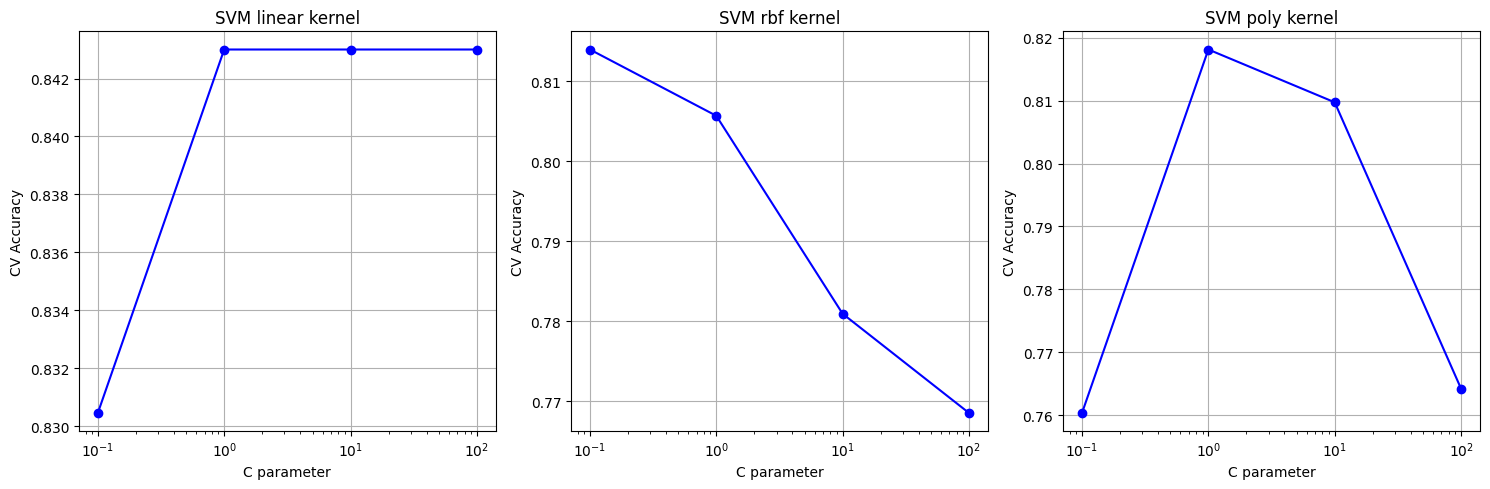


Độ chính xác SVM trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Độ chính xác SVM trên tập test: 0.8710
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [9]:
# --- Huấn luyện và đánh giá trên bộ FE ---
svm_model, scaler, val_fe_acc, best_params = evaluate_val_svm(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
test_fe_acc = evaluate_test_svm(svm_model, scaler, X_fe_test, y_fe_test)

### 3.3 SVM on Original DT Dataset

Tìm tham số tối ưu cho SVM...
Đang kiểm tra các giá trị C: [0.1, 1, 10, 100]
Đang kiểm tra các kernel: ['linear', 'rbf', 'poly']
Tham số tối ưu (CV): {'kernel': 'linear', 'C': 0.1}
Điểm CV tốt nhất: 0.8346


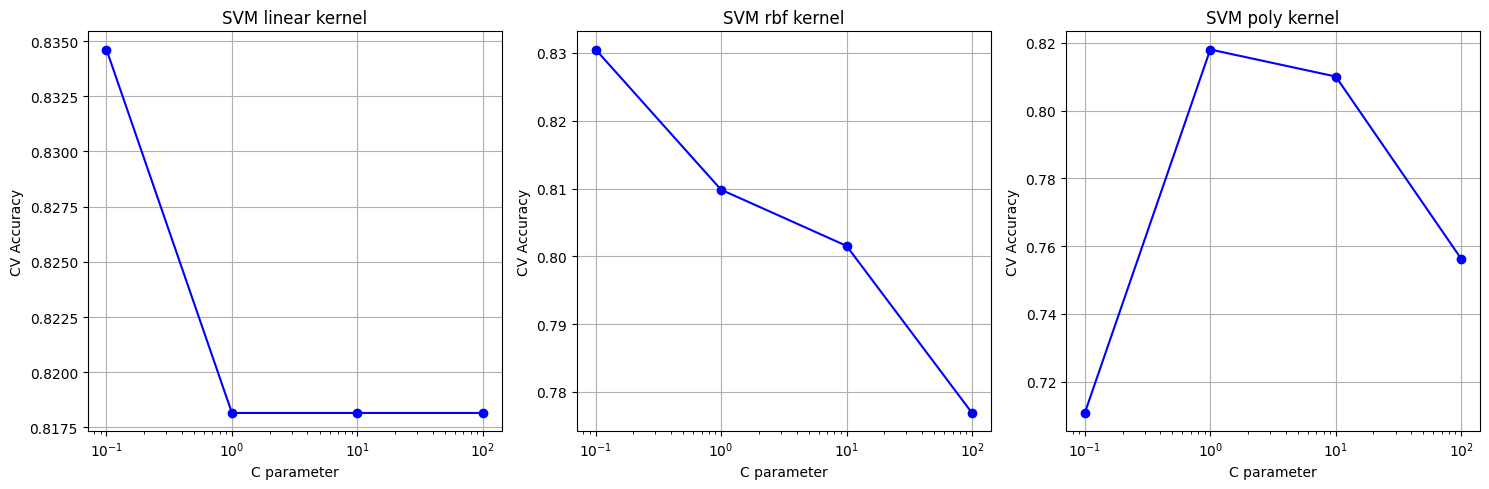


Độ chính xác SVM trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Độ chính xác SVM trên tập test: 0.7742
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.73      0.79      0.76        14

    accuracy                           0.77        31
   macro avg       0.77      0.78      0.77        31
weighted avg       0.78      0.77      0.77        31



In [10]:
# --- Huấn luyện và đánh giá trên bộ Original + DT ---
svm_model, scaler, val_dt_acc, best_params = evaluate_val_svm(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
test_dt_acc = evaluate_test_svm(svm_model, scaler, X_dt_test, y_dt_test)

### 3.4 SVM on FE + DT Dataset

Tìm tham số tối ưu cho SVM...
Đang kiểm tra các giá trị C: [0.1, 1, 10, 100]
Đang kiểm tra các kernel: ['linear', 'rbf', 'poly']
Tham số tối ưu (CV): {'kernel': 'linear', 'C': 0.1}
Điểm CV tốt nhất: 0.8305


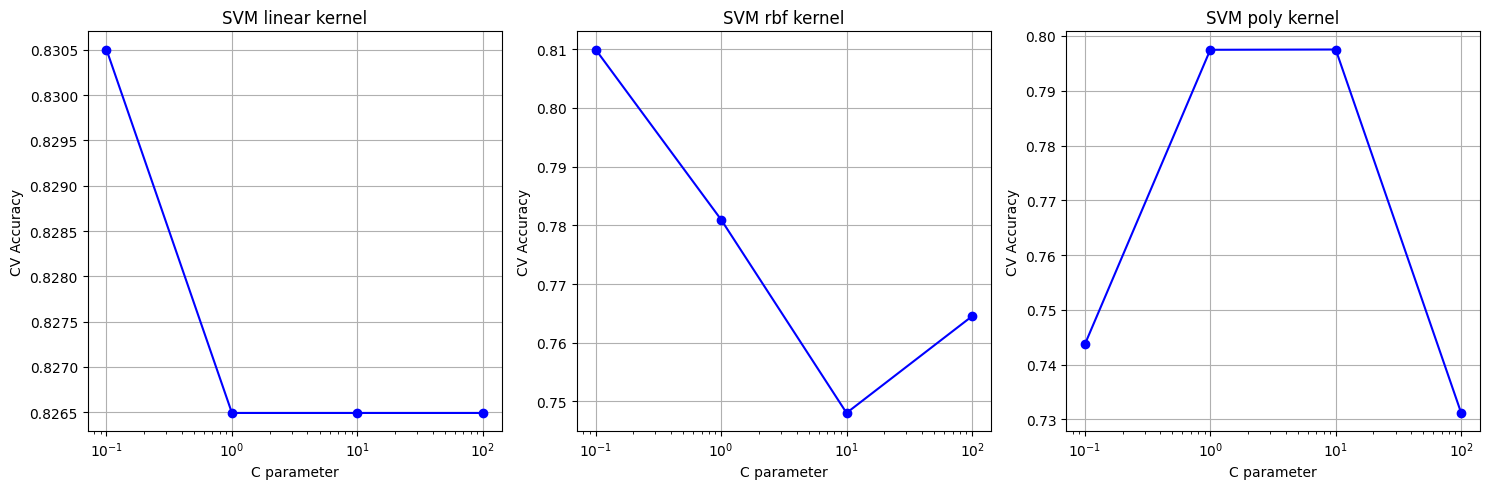


Độ chính xác SVM trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Độ chính xác SVM trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31


Đã hoàn tất huấn luyện và đánh giá trên 4 bộ dữ liệu.
Đang vẽ biểu đồ tổng hợp...


In [11]:
# --- Huấn luyện và đánh giá trên bộ FE + DT ---
svm_model, scaler, val_fe_dt_acc, best_params = evaluate_val_svm(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
test_fe_dt_acc = evaluate_test_svm(svm_model, scaler, X_fe_dt_test, y_fe_dt_test)
print("\n" + "="*50)
print("Đã hoàn tất huấn luyện và đánh giá trên 4 bộ dữ liệu.")
print("Đang vẽ biểu đồ tổng hợp...")

## 4.Result Visualization

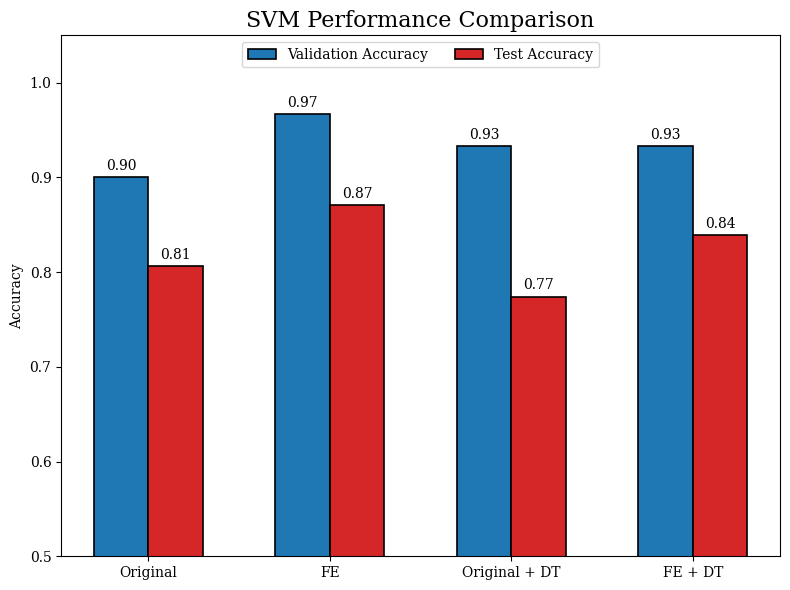

In [12]:
# --- Vẽ biểu đồ so sánh ---
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', "FE + DT"]
val_accs = [val_acc, val_fe_acc, val_dt_acc, val_fe_dt_acc]
test_accs = [test_acc, test_fe_acc, test_dt_acc, test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('SVM Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc="upper center")

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()